# Capstone project - the battle of neighborhoods (week2)
### Applied Data Science Capstone by IBM/Coursera
Carol Lobo -- project week 5

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem

Chile is a country in south america.  with more than 6,000km of Pacific Ocean coastline. Santiago, its capital, sits in a valley surrounded by the Andes and Chilean Coast Range mountains.

The economy of Chile is a high-income economy as ranked by the World Bank, and is considered one of South America's most prosperous nations,leading Latin American nations in competitiveness, income per capita, globalization, economic freedom, and low perception of corruption (https://en.wikipedia.org/wiki/Economy_of_Chile).

Chile ranks number 63 in the list of countries (and dependencies) by population. The population density in Chile is 26 per Km2 (67 people per mi2). The median age in Chile is 35.3 years. Those numbers have been incresing due high level of migration to the country because good and gentle migration conditions and opportunity in the region.

For the interior government and administration within the State, the territory of the republic has been divided into 16 regions (regiones), 56 provinces (provincias) and 346 communes (comunas). 
In this case of study we are going to see in a map the population density by region in order to impact in the take of decision in the moment of:  
-Improve public service  
-Improve infrastructure  
-Evaluate economic cost in the most population density comuna.  

## Data

I choose to work with a data frame from http://geoine-ine-chile.opendata.arcgis.com/datasets/1c64fcb18f5a41e088b25ef9f42b58d7_0?geometry=104.809%2C-59.306%2C79.321%2C-12.460&selectedAttribute=Densidad_ where there is available a cvs file with the information about it.


In [1]:
#import libraries
import pandas as pd
import numpy as np

#Import visualization packages "Matplotlib" and "Seaborn", "%matplotlib inline" to plot in a Jupyter notebook.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests

Solving environment: done

# All requested packages already installed.



In [2]:
#read the dataset
dataset = pd.read_csv('Censo_2017_Comuna_Pobl_viviendas_densidad.csv')
dataset.head()

,OBJECTID,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,...,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,Shape_Leng,Shape__Area,Shape__Length,SUPERFICIE__KM2_,Densidad_
0,1,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,121,MAGALLANES,12102,LAGUNA BLANCA,191,83,274,...,83,274,0,285,285,3.441274,9.341689e+09,5.097627e+05,3496.802490,0.078357
1,2,2,REGIÓN DE ANTOFAGASTA,22,EL LOA,2202,OLLAGÜE,207,114,321,...,114,321,0,439,439,2.637250,3.388897e+09,3.089977e+05,2920.857910,0.109899
2,3,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,123,TIERRA DEL FUEGO,12303,TIMAUKEL,343,62,405,...,62,405,0,214,214,20.830903,3.204456e+10,2.862313e+06,11018.557617,0.036756
3,4,11,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,113,CAPITÁN PRAT,11303,TORTEL,285,238,523,...,238,523,0,320,320,98.277349,4.492944e+10,1.296318e+07,20106.427734,0.026012
4,5,12,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,121,MAGALLANES,12103,RÍO VERDE,522,95,617,...,95,617,0,231,231,47.992364,2.505578e+10,6.348059e+06,9158.579102,0.067369


In the dataset, I have 24 columns with data about each comuna of each region of the country. Each column means:  
**OBJECTID**: object identifier (row number)  
**REGION**: Region code  
**NOM_REGION**: Region name  
**PROVINCIA**: provincia code  
**NOM_PROVINCIA**: provincia name  
**COMUNA**: comuna code  
**NOM_COMUNA**: comuna name  
**T_HOM_R**: rural men total  
**T_MUJ_R**: rural women total  
**T_POB_R**: rural people total  
**T_HOM_U**: urban men total  
**T_MUJ_U**: urban women total  
**T_POB_U**: urban people total  
**T_HOM**: men total  
**T_MUJ**: women total  
**T_POB**: people total  
**T_VIV_U**: urban housing total  
**T_VIV_R**: rural housing total  
**T_VIV**: housing total  
**Shape_Leng**:   
**Shape__Area**:  
**Shape__Length**:  
**SUPERFICIE__KM2_**:surface  
**Densidad_'**: density (people total / surface)  

Let's do some analysis about data:

In [3]:
dataset.describe(include = "all")

,OBJECTID,REGION,NOM_REGION,PROVINCIA,NOM_PROVIN,COMUNA,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,...,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,Shape_Leng,Shape__Area,Shape__Length,SUPERFICIE__KM2_,Densidad_
count,345.000000,345.000000,345,345.000000,345,345.000000,345,345.000000,345.000000,345.000000,...,345.000000,345.000000,345.000000,345.000000,345.000000,345.000000,3.450000e+02,3.450000e+02,345.000000,345.000000
unique,NaN,NaN,16,NaN,56,NaN,345,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,REGIÓN METROPOLITANA DE SANTIAGO,NaN,SANTIAGO,NaN,PUMANQUE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,52,NaN,32,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,173.000000,8.788406,NaN,90.200000,NaN,9025.817391,NaN,3289.898551,2940.831884,6230.730435,...,26005.802899,50938.739130,16040.420290,2798.240580,18838.660870,5.190274,3.745268e+09,6.707317e+05,2182.580164,896.121152
std,99.737155,3.848721,NaN,38.187847,NaN,3819.867435,NaN,3207.463285,3051.799037,6225.865372,...,40590.360216,78758.750613,27714.068669,2560.713113,27715.183902,25.241467,9.775788e+09,3.396658e+06,4820.683358,2762.513432
min,1.000000,1.000000,NaN,11.000000,NaN,1101.000000,NaN,0.000000,0.000000,0.000000,...,62.000000,274.000000,0.000000,0.000000,214.000000,0.106701,8.935113e+06,1.276826e+04,6.277112,0.026012
25%,87.000000,6.000000,NaN,61.000000,NaN,6109.000000,NaN,1108.000000,885.000000,2112.000000,...,4596.000000,9548.000000,1687.000000,1124.000000,4153.000000,0.917922,3.863576e+08,1.095551e+05,261.749420,9.425850
50%,173.000000,8.000000,NaN,83.000000,NaN,8313.000000,NaN,2548.000000,2144.000000,4807.000000,...,9265.000000,18546.000000,4385.000000,2240.000000,7909.000000,1.715304,9.911416e+08,2.108756e+05,631.989502,28.108671
75%,259.000000,13.000000,NaN,131.000000,NaN,13103.000000,NaN,4569.000000,4087.000000,8487.000000,...,26092.000000,50554.000000,16216.000000,3956.000000,19701.000000,2.933680,2.532762e+09,3.587673e+05,1642.238281,103.433998


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          345 non-null    int64  
 1   REGION            345 non-null    int64  
 2   NOM_REGION        345 non-null    object 
 3   PROVINCIA         345 non-null    int64  
 4   NOM_PROVIN        345 non-null    object 
 5   COMUNA            345 non-null    int64  
 6   NOM_COMUNA        345 non-null    object 
 7   T_HOM_R           345 non-null    int64  
 8   T_MUJ_R           345 non-null    int64  
 9   T_POB_R           345 non-null    int64  
 10  T_HOM_U           345 non-null    int64  
 11  T_MUJ_U           345 non-null    int64  
 12  T_POB_U           345 non-null    int64  
 13  T_HOM             345 non-null    int64  
 14  T_MUJ             345 non-null    int64  
 15  T_POB             345 non-null    int64  
 16  T_VIV_U           345 non-null    int64  
 1

In [5]:
#In the correlation we can see which are the potential predictor variable of density (Densidad)
dataset.corr()

,OBJECTID,REGION,PROVINCIA,COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,...,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,Shape_Leng,Shape__Area,Shape__Length,SUPERFICIE__KM2_,Densidad_
OBJECTID,1.000000,0.091194,0.087152,0.087448,0.315379,0.306619,0.312776,0.697562,0.699793,0.698953,...,0.721426,0.721435,0.689565,0.260600,0.713615,-0.047117,-0.130168,-0.046220,-0.114689,0.419072
REGION,0.091194,1.000000,0.999177,0.999194,-0.007927,0.038639,0.014856,0.135249,0.137259,0.136333,...,0.139885,0.137069,0.109227,-0.032815,0.106190,0.077481,-0.017031,0.080234,-0.143579,0.308246
PROVINCIA,0.087152,0.999177,1.000000,0.999999,-0.005046,0.042628,0.018296,0.128768,0.130781,0.129851,...,0.133721,0.130880,0.102877,-0.030573,0.100048,0.078933,-0.016786,0.081732,-0.144968,0.301282
COMUNA,0.087448,0.999194,0.999999,1.000000,-0.005287,0.042414,0.018067,0.128965,0.130992,0.130055,...,0.133915,0.131066,0.103055,-0.030813,0.100204,0.078734,-0.017088,0.081537,-0.145273,0.301906
T_HOM_R,0.315379,-0.007927,-0.005046,-0.005287,1.000000,0.978701,0.994924,0.012804,0.013988,0.013419,...,0.087544,0.092025,0.012511,0.928985,0.098343,-0.054187,-0.056150,-0.055361,-0.020846,-0.294606
T_MUJ_R,0.306619,0.038639,0.042628,0.042414,0.978701,1.000000,0.994392,-0.013512,-0.010649,-0.012040,...,0.064558,0.066605,-0.009286,0.940566,0.077617,-0.076008,-0.124987,-0.076145,-0.122809,-0.276122
T_POB_R,0.312776,0.014856,0.018296,0.018067,0.994924,0.994392,1.000000,-0.000027,0.001986,0.001012,...,0.076746,0.080058,0.001894,0.939645,0.088711,-0.065174,-0.090194,-0.065846,-0.070938,-0.287126
T_HOM_U,0.697562,0.135249,0.128768,0.128965,0.012804,-0.013512,-0.000027,1.000000,0.998626,0.999634,...,0.995583,0.996424,0.982480,-0.058076,0.977075,-0.030740,-0.046837,-0.030241,-0.022056,0.485686
T_MUJ_U,0.699793,0.137259,0.130781,0.130992,0.013988,-0.010649,0.001986,0.998626,1.000000,0.999678,...,0.997170,0.996627,0.982532,-0.055196,0.977392,-0.033468,-0.053208,-0.032889,-0.031004,0.478532
T_POB_U,0.698953,0.136333,0.129851,0.130055,0.013419,-0.012040,0.001012,0.999634,0.999678,1.000000,...,0.996744,0.996871,0.982844,-0.056610,0.977574,-0.032158,-0.050141,-0.031617,-0.026681,0.482162


I decided to drop some columns that i won't use:

In [6]:
dataset.drop(['OBJECTID', 'REGION', 'PROVINCIA','NOM_PROVIN','COMUNA', 'Shape_Leng', 'Shape__Area', 'Shape__Length'],axis=1, inplace=True)

In [7]:
dataset.head()

,NOM_REGION,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_
0,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,LAGUNA BLANCA,191,83,274,0,0,0,191,83,274,0,285,285,3496.802490,0.078357
1,REGIÓN DE ANTOFAGASTA,OLLAGÜE,207,114,321,0,0,0,207,114,321,0,439,439,2920.857910,0.109899
2,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,TIMAUKEL,343,62,405,0,0,0,343,62,405,0,214,214,11018.557617,0.036756
3,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,TORTEL,285,238,523,0,0,0,285,238,523,0,320,320,20106.427734,0.026012
4,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,RÍO VERDE,522,95,617,0,0,0,522,95,617,0,231,231,9158.579102,0.067369


Finally I get a dataframe smaller but with the columns that I really need. 

## Methodology

The aim in this use case is to evaluate the distribution of people in the country: which region and comuna have the most density of population. With this knowledge we  can focus in the comunas with more population and more density in order to evaluate the social and economical situation of people, the situation of public services, etc. Also I'm going to work with Foursquare app to know e venues which people count in this comunas, specially the crowed one.

## Analysis

What is the total amount of people that live in each region? which of the is the most crowded?

In [8]:
#number of population by region
df_region=dataset[['NOM_REGION','T_POB']]
df_group = df_region.groupby(['NOM_REGION'],as_index=False).sum()
df_group

,NOM_REGION,T_POB
0,REGIÓN DE ANTOFAGASTA,607534
1,REGIÓN DE ARICA Y PARINACOTA,226068
2,REGIÓN DE ATACAMA,286168
3,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,103158
4,REGIÓN DE COQUIMBO,757586
5,REGIÓN DE LA ARAUCANÍA,957224
6,REGIÓN DE LOS LAGOS,828708
7,REGIÓN DE LOS RÍOS,384837
8,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,166395
9,REGIÓN DE TARAPACÁ,330558


The **region** with most population is the *REGION METROPOLITANA DE SANTIAGO*, the capital of the country, and the region with less is *REGIÓN DE AYSEN*.

In [9]:
df_group=df_group.set_index(['NOM_REGION'])

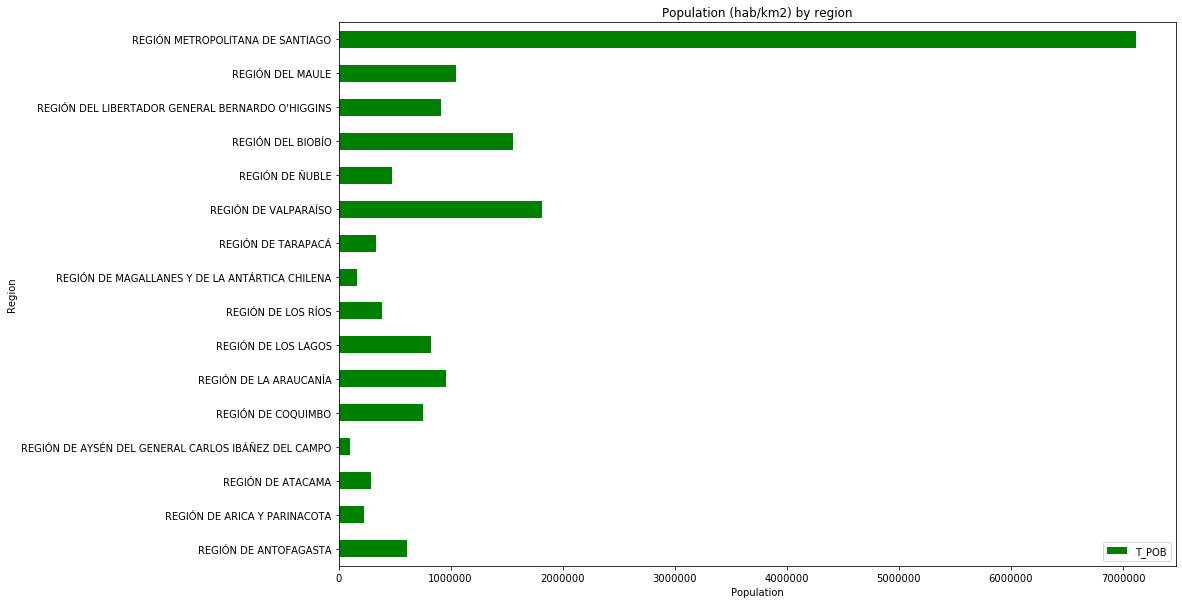

In [10]:
df_group.plot(kind='barh', figsize=(15, 10), color='g')
plt.xlabel('Population')
plt.ylabel('Region')
plt.title('Population (hab/km2) by region')
plt.show()

In the graphic below, we can see that the region with most population is the capital of the country, Santiago (more than 7 millions). Let's see if it has the more density of population (people by km2):

In [11]:
#density by region
density_region=dataset[['NOM_REGION','Densidad_']]
density_region = density_region.groupby(['NOM_REGION'],as_index=False).sum()
density_region

,NOM_REGION,Densidad_
0,REGIÓN DE ANTOFAGASTA,34.985320
1,REGIÓN DE ARICA Y PARINACOTA,47.282682
2,REGIÓN DE ATACAMA,34.118703
3,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,14.041365
4,REGIÓN DE COQUIMBO,397.477174
5,REGIÓN DE LA ARAUCANÍA,1456.078109
6,REGIÓN DE LOS LAGOS,876.837495
7,REGIÓN DE LOS RÍOS,328.277493
8,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,9.659691
9,REGIÓN DE TARAPACÁ,275.989748


In [12]:
density_region=density_region.set_index(['NOM_REGION'])

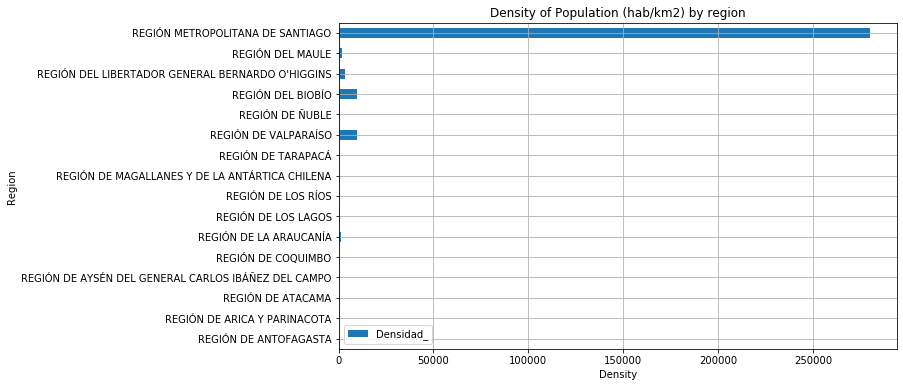

In [13]:
density_region.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Density')
plt.ylabel('Region')
plt.title('Density of Population (hab/km2) by region')
plt.grid(True)
plt.show()

So, more than 90% of density of population is concentrate in the Region metropolitana de Santiago. 

Now, I read a file with the latitude and longitude coordinates. It is available in: https://github.com/2x3-la/geo-chile

In [14]:
lat_lon=pd.read_json('chile.json')
pd.DataFrame(lat_lon)

,name,lng,lat
0,Santiago,-70.666667,-33.450000
1,Cerro Navia,-70.716667,-33.416667
2,El Bosque,-70.700000,-33.566667
3,Huechuraba,-70.666667,-33.350000
4,La Cisterna,-70.683333,-33.550000
...,...,...,...
340,Natales,-72.516667,-51.733333
341,Primavera,-69.250000,-52.716667
342,Antártica,-71.500000,-75.000000
343,San Gregorio,-69.683333,-52.316667


In [15]:
#rename "name" column of lat_lon dataset in order to merge with the original dataset
lat_lon.rename(columns={'name': 'NOM_COMUNA'}, inplace=True)
lat_lon['NOM_COMUNA'] = lat_lon['NOM_COMUNA'].str.upper()
lat_lon

,NOM_COMUNA,lng,lat
0,SANTIAGO,-70.666667,-33.450000
1,CERRO NAVIA,-70.716667,-33.416667
2,EL BOSQUE,-70.700000,-33.566667
3,HUECHURABA,-70.666667,-33.350000
4,LA CISTERNA,-70.683333,-33.550000
...,...,...,...
340,NATALES,-72.516667,-51.733333
341,PRIMAVERA,-69.250000,-52.716667
342,ANTÁRTICA,-71.500000,-75.000000
343,SAN GREGORIO,-69.683333,-52.316667


In [16]:
#Merge both dataset to get latitud and logitud values
data_lon_lat = pd.merge(dataset,lat_lon, on='NOM_COMUNA')
data_lon_lat

,NOM_REGION,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_,lng,lat
0,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,LAGUNA BLANCA,191,83,274,0,0,0,191,83,274,0,285,285,3496.802490,0.078357,-71.916667,-52.250000
1,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,TIMAUKEL,343,62,405,0,0,0,343,62,405,0,214,214,11018.557617,0.036756,-69.900000,-53.666667
2,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,TORTEL,285,238,523,0,0,0,285,238,523,0,320,320,20106.427734,0.026012,-73.566667,-47.833333
3,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,RÍO VERDE,522,95,617,0,0,0,522,95,617,0,231,231,9158.579102,0.067369,-71.483333,-52.650000
4,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,O'HIGGINS,374,251,625,0,0,0,374,251,625,0,363,363,7773.660156,0.080400,-72.566667,-48.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,REGIÓN DE ANTOFAGASTA,ANTOFAGASTA,6906,863,7769,174940,179164,354104,181846,180027,361873,111752,699,112451,30690.392578,11.791084,-70.400000,-23.633333
334,REGIÓN METROPOLITANA DE SANTIAGO,LA FLORIDA,67,50,117,175626,191173,366799,175693,191223,366916,119991,44,120035,70.822655,5180.771484,-70.566667,-33.550000
335,REGIÓN METROPOLITANA DE SANTIAGO,SANTIAGO,0,0,0,206678,197817,404495,206678,197817,404495,193628,0,193628,23.135237,17483.935547,-70.666667,-33.450000
336,REGIÓN METROPOLITANA DE SANTIAGO,MAIPÚ,1952,1481,3433,248840,269354,518194,250792,270835,521627,160389,965,161354,137.676132,3788.797607,-70.766667,-33.516667


In [17]:
data_lon_lat.head()

,NOM_REGION,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_,lng,lat
0,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,LAGUNA BLANCA,191,83,274,0,0,0,191,83,274,0,285,285,3496.802490,0.078357,-71.916667,-52.250000
1,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,TIMAUKEL,343,62,405,0,0,0,343,62,405,0,214,214,11018.557617,0.036756,-69.900000,-53.666667
2,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,TORTEL,285,238,523,0,0,0,285,238,523,0,320,320,20106.427734,0.026012,-73.566667,-47.833333
3,REGIÓN DE MAGALLANES Y DE LA ANTÁRTICA CHILENA,RÍO VERDE,522,95,617,0,0,0,522,95,617,0,231,231,9158.579102,0.067369,-71.483333,-52.650000
4,REGIÓN DE AYSÉN DEL GENERAL CARLOS IBÁÑEZ DEL ...,O'HIGGINS,374,251,625,0,0,0,374,251,625,0,363,363,7773.660156,0.080400,-72.566667,-48.466667


Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'SDB14ASDOOCN0HI0UDVMFPWSZOEKG5M1LOI5FNDTBKXNOIIB' # your Foursquare ID
CLIENT_SECRET = 'RYALKSQNP4PAX1U2LV31JMYJOQ2K2HG4YXHR5SUR0WCLWAHA' # your Foursquare Secret
VERSION = '20200527'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SDB14ASDOOCN0HI0UDVMFPWSZOEKG5M1LOI5FNDTBKXNOIIB
CLIENT_SECRET:RYALKSQNP4PAX1U2LV31JMYJOQ2K2HG4YXHR5SUR0WCLWAHA


Let's get the geographical coordinates of Chile:

In [19]:
address = 'Chile'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chile are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chile are -31.7613365, -71.3187697.


Let's create a map of Chile comunas:

In [20]:
import folium

# create map of New York using latitude and longitude values
map_chile = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, NOM_REGION, NOM_COMUNA in zip(data_lon_lat['lat'], data_lon_lat['lng'], data_lon_lat['NOM_REGION'], data_lon_lat['NOM_COMUNA']):
    label = '{}, {}'.format(NOM_COMUNA, NOM_REGION)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chile)  
    
map_chile

I'm going to reduce the scale mapping only the region of Santiago, where the are the capital of the country, in order to represent and evaluate population in this Region.

In [21]:
#SAntiago data
santiago_data = data_lon_lat[data_lon_lat['NOM_REGION'] == 'REGIÓN METROPOLITANA DE SANTIAGO'].reset_index(drop=True)
santiago_data.shape

(51, 18)

In [22]:
santiago_data

,NOM_REGION,NOM_COMUNA,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_,lng,lat
0,REGIÓN METROPOLITANA DE SANTIAGO,SAN PEDRO,5132,4594,9726,0,0,0,5132,4594,9726,0,4187,4187,787.972168,12.343075,-71.466667,-33.900000
1,REGIÓN METROPOLITANA DE SANTIAGO,MARÍA PINTO,3520,3403,6923,3310,3357,6667,6830,6760,13590,2261,2591,4852,394.598328,34.440083,-71.133333,-33.533333
2,REGIÓN METROPOLITANA DE SANTIAGO,SAN JOSÉ DE MAIPO,4233,2748,6981,5628,5580,11208,9861,8328,18189,4033,2893,6926,4982.684082,3.650442,-70.366667,-33.633333
3,REGIÓN METROPOLITANA DE SANTIAGO,TILTIL,3499,2743,6242,6548,6522,13070,10047,9265,19312,4341,2593,6934,654.227539,29.518782,-70.933333,-33.083333
4,REGIÓN METROPOLITANA DE SANTIAGO,CALERA DE TANGO,6963,6884,13847,5755,5790,11545,12718,12674,25392,3525,4076,7601,73.148895,347.127625,-70.816667,-33.650000
5,REGIÓN METROPOLITANA DE SANTIAGO,PIRQUE,7536,7315,14851,5893,5777,11670,13429,13092,26521,3530,4778,8308,445.253143,59.563869,-70.550000,-33.633333
6,REGIÓN METROPOLITANA DE SANTIAGO,CURACAVÍ,6288,5931,12219,9934,10426,20360,16222,16357,32579,6701,5105,11806,694.065613,46.939365,-71.150000,-33.400000
7,REGIÓN METROPOLITANA DE SANTIAGO,EL MONTE,3017,2861,5878,14776,15269,30045,17793,18130,35923,9778,2091,11869,114.872238,312.721344,-71.016667,-33.683333
8,REGIÓN METROPOLITANA DE SANTIAGO,ISLA DE MAIPO,4756,4522,9278,13295,13646,26941,18051,18168,36219,8572,3254,11826,189.336411,191.294434,-70.900000,-33.750000
9,REGIÓN METROPOLITANA DE SANTIAGO,PADRE HURTADO,3919,3603,7522,27533,28195,55728,31452,31798,63250,18422,2385,20807,81.068062,780.208557,-70.833333,-33.566667


Let's get the geographical coordinates of SANTIAGO region

In [23]:
address = 'Santiago,Santiago'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Santiago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Santiago are -33.4377968, -70.6504451.


In [24]:
# create map of New York using latitude and longitude values
map_santiago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, NOM_COMUNA in zip(data_lon_lat['lat'], data_lon_lat['lng'], data_lon_lat['NOM_COMUNA']):
    label = '{}'.format(NOM_COMUNA)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_santiago)  
    
map_santiago

Pick randomly two comunas in order to evaluate the amount of venues or places that people have access in order the density on comuna:

In [25]:
comuna_latitude = santiago_data.loc[45, 'lat']
comuna_longitude = santiago_data.loc[45, 'lng']

comuna_name = santiago_data.loc[45, 'NOM_COMUNA']
print('Latitude and longitude values of {} are {}, {}.'.format(comuna_name, 
                                                               comuna_latitude, 
                                                               comuna_longitude))

Latitude and longitude values of LAS CONDES are -33.4166667, -70.5833333.


 Now, let's get the top 100 venues that are in Las Condes within a radius of 500 meters.
 First, let's create the GET request URL. Name your URL **url**.

In [26]:
LIMIT = 100 # venues returned by Foursquare API
radius = 500 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    comuna_latitude, 
    comuna_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SDB14ASDOOCN0HI0UDVMFPWSZOEKG5M1LOI5FNDTBKXNOIIB&client_secret=RYALKSQNP4PAX1U2LV31JMYJOQ2K2HG4YXHR5SUR0WCLWAHA&v=20200527&ll=-33.4166667,-70.5833333&radius=500&limit=100'

In [27]:
#send the request to examinate the result
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef5f048d2bf83199c40f58f'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Las Condes',
  'headerFullLocation': 'Las Condes, Santiago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 37,
  'suggestedBounds': {'ne': {'lat': -33.4121666955, 'lng': -70.57795212272781},
   'sw': {'lat': -33.4211667045, 'lng': -70.5887144772722}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '59c5344cbb8d364e9b7ecb9f',
       'name': 'Maru Restaurante',
       'location': {'address': 'Apqouindo 4411 local 151',
        'lat': -33.414716652180324,
        'lng': -70.58511214401265,
        'labeledLatLngs': [{'label': 'display',
          'lat': -

In [28]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [29]:
import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from pandas import json_normalize # tranform JSON file into a pandas dataframe

# clean the json and structure it into a pandas dataframe.
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Maru Restaurante,Japanese Restaurant,-33.414717,-70.585112
1,Openbox Store,Board Shop,-33.413379,-70.583480
2,Plaza Mustafa Kemal Ataturk,Plaza,-33.414745,-70.587407
3,Chocolateria Caramel,Dessert Shop,-33.418113,-70.587733
4,Plaza República de Paraguay,Plaza,-33.417977,-70.581744
5,Buffalo Waffles,Creperie,-33.414280,-70.585126
6,Tostaduría Mataquito,Dessert Shop,-33.413503,-70.582266
7,Starbucks,Coffee Shop,-33.414276,-70.583839
8,Da Dino,Pizza Place,-33.414732,-70.586829
9,La Ogazza,Bakery,-33.414200,-70.584863


In [30]:
#how many venues(places) return foursquare? 
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

37 venues were returned by Foursquare.


Now I'm going to do the same process but to another comuna:

In [31]:
comuna_latitude1 = santiago_data.loc[0, 'lat']
comuna_longitude1 = santiago_data.loc[0, 'lng']

comuna_name1 = santiago_data.loc[0, 'NOM_COMUNA']
print('Latitude and longitude values of {} are {}, {}.'.format(comuna_name1, 
                                                               comuna_latitude1, 
                                                               comuna_longitude1))

Latitude and longitude values of SAN PEDRO are -33.9, -71.4666667.


In [32]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    comuna_latitude1, 
    comuna_longitude1, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=SDB14ASDOOCN0HI0UDVMFPWSZOEKG5M1LOI5FNDTBKXNOIIB&client_secret=RYALKSQNP4PAX1U2LV31JMYJOQ2K2HG4YXHR5SUR0WCLWAHA&v=20200527&ll=-33.9,-71.4666667&radius=500&limit=100'

In [33]:
#send the request to examinate the result
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef5f1fc21cdee79b01b3a4d'},
 'response': {'warning': {'text': "There aren't a lot of results near you. Try something more general, reset your filters, or expand the search area."},
  'headerLocation': 'San Pedro',
  'headerFullLocation': 'San Pedro',
  'headerLocationGranularity': 'city',
  'totalResults': 0,
  'suggestedBounds': {'ne': {'lat': -33.895499995499996,
    'lng': -71.46125521084817},
   'sw': {'lat': -33.9045000045, 'lng': -71.47207818915184}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': []}]}}

As you can see, comunas far from the capital, as San Pedro, doesn't have information the venues register in Foursquare. That result could mean that is a town not much visit o where the level of population is low. In this case, San Pedro has a density rate of 12 hab/km2 low, in contradistinction to Las Condes, which density rate in 2977. We can see the difference in a graph:

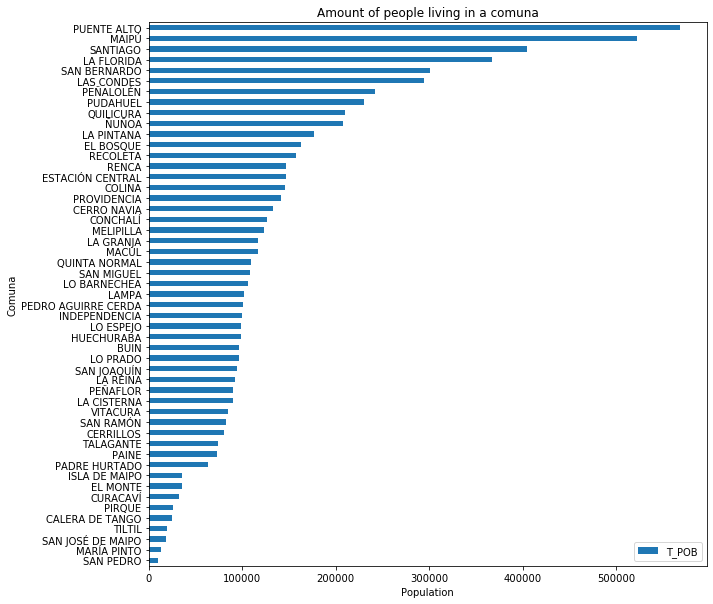

In [34]:
poblacion_por_comuna=santiago_data[['NOM_COMUNA','T_POB']]
poblacion_por_comuna=poblacion_por_comuna.set_index(['NOM_COMUNA'])

poblacion_por_comuna.plot(kind='barh', figsize=(10, 10))
plt.xlabel('Population') # add to x-label to the plot
plt.ylabel('Comuna') # add y-label to the plot
plt.title('Amount of people living in a comuna') # add title to the plot
plt.show()

In [35]:
#graph of population density by comuna
densidad_por_comuna=santiago_data[['NOM_COMUNA','Densidad_']]
densidad_por_comuna=densidad_por_comuna.set_index(['NOM_COMUNA'])


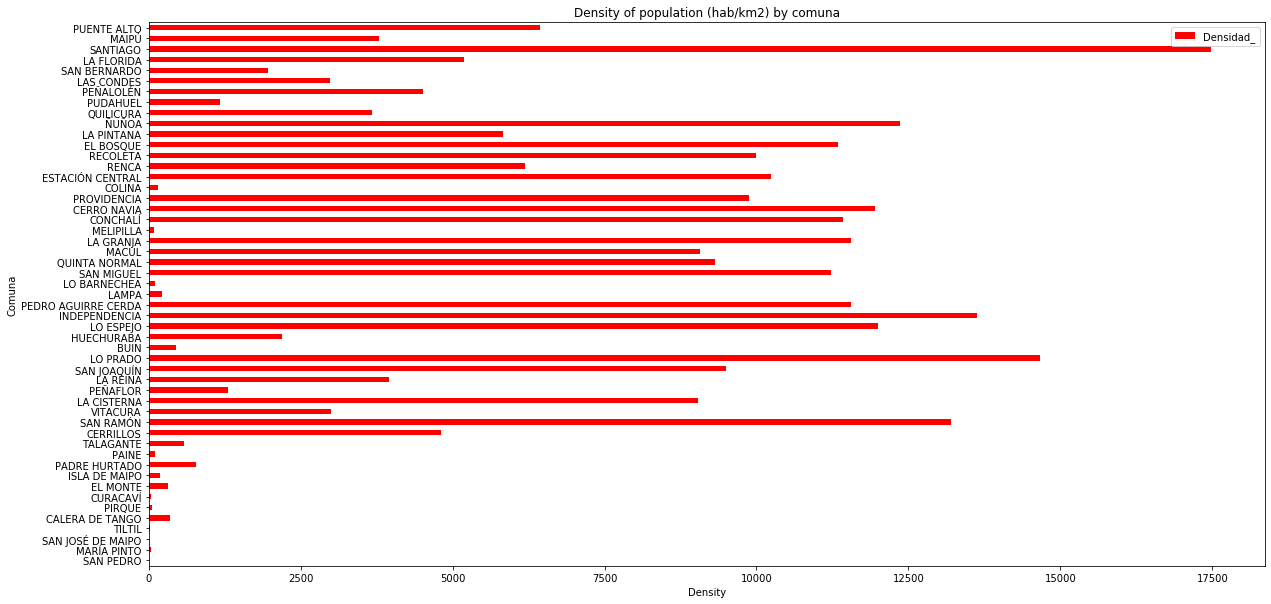

In [36]:
densidad_por_comuna.plot(kind='barh', figsize=(20, 10), color='r')

plt.xlabel('Density')
plt.ylabel('Comuna')
plt.title('Density of population (hab/km2) by comuna')
plt.show()

In the plot above, we can see that San Pedro is the comuna with less amout of people and less population density. Instead of Las Condes, although it has more population that San Pedro, it is not the more crowded, it is Puente Alto. Also it is important to see that comuna with more density is Santiago. In the capital, there are more than 17000 people by km2. That amount it is huge and important to handle when public service we talk.

### Machine learning model

I'm going to applied a clustering model over the dataset, specificallt k-means for population segmentation

First, prepare the dataset in order to get only numerical variables:

In [37]:
#santiago_data.drop(['NOM_REGION','NOM_COMUNA','lng', 'lat'],axis=1, inplace=True)
santiago_data_ml=santiago_data.drop(['NOM_REGION','NOM_COMUNA','lng', 'lat'],axis=1)

In [38]:
santiago_data_ml.head()

,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_
0,5132,4594,9726,0,0,0,5132,4594,9726,0,4187,4187,787.972168,12.343075
1,3520,3403,6923,3310,3357,6667,6830,6760,13590,2261,2591,4852,394.598328,34.440083
2,4233,2748,6981,5628,5580,11208,9861,8328,18189,4033,2893,6926,4982.684082,3.650442
3,3499,2743,6242,6548,6522,13070,10047,9265,19312,4341,2593,6934,654.227539,29.518782
4,6963,6884,13847,5755,5790,11545,12718,12674,25392,3525,4076,7601,73.148895,347.127625


Now let's normalize the dataset:

In [39]:
from sklearn.preprocessing import StandardScaler

X = santiago_data_ml.values[:,1:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)
cluster_dataset

array([[ 5.18360903e-01,  5.50530043e-01, -1.12162906e+00,
        -1.11847244e+00, -1.12081330e+00, -1.10169076e+00,
        -1.10530582e+00, -1.10440409e+00, -1.06396864e+00,
         8.21119932e-01, -1.02876829e+00,  6.87187422e-01,
        -1.06929172e+00],
       [ 2.29728451e-01,  2.17321238e-01, -1.06466898e+00,
        -1.06410893e+00, -1.06515068e+00, -1.07184914e+00,
        -1.06953456e+00, -1.07148016e+00, -1.01027624e+00,
         2.76658741e-01, -1.01263199e+00,  1.49390799e-01,
        -1.06497779e+00],
       [ 7.09927203e-02,  2.24216033e-01, -1.02477972e+00,
        -1.02810950e+00, -1.02723798e+00, -1.01858062e+00,
        -1.04363921e+00, -1.03229353e+00, -9.68196222e-01,
         3.79683352e-01, -9.62306131e-01,  6.42194066e+00,
        -1.07098876e+00],
       [ 6.97809972e-02,  1.36366833e-01, -1.00894791e+00,
        -1.01285468e+00, -1.01169219e+00, -1.01531175e+00,
        -1.02816475e+00, -1.02272480e+00, -9.60882088e-01,
         2.77341023e-01, -9.62112010e

Let's run our model and group our customers into three clusters.

In [40]:
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

num_clusters = 3

k_means = KMeans(init="k-means++", n_clusters=num_clusters)
k_means.fit(cluster_dataset)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 2 2 2 2 2 2]


In [42]:
santiago_data_ml["Labels"] = labels
santiago_data_ml.head(5)

,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_,Labels
0,5132,4594,9726,0,0,0,5132,4594,9726,0,4187,4187,787.972168,12.343075,0
1,3520,3403,6923,3310,3357,6667,6830,6760,13590,2261,2591,4852,394.598328,34.440083,0
2,4233,2748,6981,5628,5580,11208,9861,8328,18189,4033,2893,6926,4982.684082,3.650442,0
3,3499,2743,6242,6548,6522,13070,10047,9265,19312,4341,2593,6934,654.227539,29.518782,0
4,6963,6884,13847,5755,5790,11545,12718,12674,25392,3525,4076,7601,73.148895,347.127625,0


Check the centroid values by averaging the features in each cluster:

In [43]:
santiago_data_ml.groupby('Labels').mean()

,T_HOM_R,T_MUJ_R,T_POB_R,T_HOM_U,T_MUJ_U,T_POB_U,T_HOM,T_MUJ,T_POB,T_VIV_U,T_VIV_R,T_VIV,SUPERFICIE__KM2_,Densidad_
Labels,,,,,,,,,,,,,,
0,7372.235294,6963.411765,14335.647059,21682.705882,22004.000000,43686.705882,29054.941176,28967.411765,58022.352941,13994.764706,4964.823529,18959.588235,722.430117,277.973671
1,167.178571,100.857143,268.035714,63146.750000,67395.535714,130542.285714,63313.928571,67496.392857,130810.321429,42676.285714,134.250000,42810.535714,60.661114,8478.571020
2,770.166667,667.666667,1437.833333,197901.000000,210210.333333,408111.333333,198671.166667,210878.000000,409549.166667,142026.000000,436.666667,142462.666667,95.298201,6306.615112


<em>k</em>-means will partition comunas into three groups since we specified the algorithm to generate 3 clusters. 
The customers in each cluster are similar to each other in terms of the features included in the dataset.

## Results

Based of análisis of data we can see:

- Chile has concentrated its population in the región metropolitana of Santiago.  
- In the región of Santiago there are 51 comunas where is concentrated more tan 90% of population.
- The Santiago comuna has the most density of population, more tan 17500 people by km2.
- The comunas of Santiago región, like Las Condes, has venues accesible to the population, but comunas far from the capital don’t have venues registered in Foursquare app. It could be:
    - Few level of population that live.
    - Few level of visitors to this regions.
    - Internet Access limited in order to register venues in foursquare app.
    - Few people know the application.

## Discussion

Based of análisis of data we can see:

Chile has concentrated its population in the región metropolitana of Santiago.

In the región of Santiago there are 51 comunas where is concentrated more tan 90% of population.

The Santiago comuna has the most density of population, more tan 17500 people by km2.

The comunas of Santiago región, like Las Condes, has venues accesible to the population, but comunas far from the capital don’t have venues registered in Foursquare app. It could be:
 to the few level of population that live.
Few level of visitors to this regions.
Internet Access limited in order to register venues in foursquare app.
Few people know the application.


## Conclusion

The capital of Chile is the región with most population in the rest of the country. Many countries have in the same situations, but Chile has a high density of population, that impact in the good provision of basic and public service like: transportation, security, rates of water and electricity, internet access. Also, high density affects the quality of air and water that impact in the health of habitants.

So, it´s important take the considerations about these results in order to evaluate and improve the quality of life of people in crowded zones. Also, regions with few populations need attention of service that lack of them because of goverment could wrong thinks it isn’t important to pay attention.

Community application lake Foursquare has to do a effort to update his locations or try to arrive to this place where there is few locations registered.